In [1]:
# for plotting
%matplotlib inline
import matplotlib.pyplot as plt
# for arrays
import numpy as np
# helper functions
from src.sim_funcs import coin_flips, nps_sim, nps_margin_of_error
# change plots to ggplot styling
plt.style.use('ggplot')

# Margin of Error for Small Survey Sizes: A Simulation Study

## Net Promoter Score
[In 2003, Fred Reichheld popularized the Net Promoter Score (NPS)](https://hbr.org/2003/12/the-one-number-you-need-to-grow), which starts with a survey question that asks customers to respond to the question: "How likely is it that you would recommend our company/product/service to a friend or colleague?" on a scale of 0 (low) to 10 (high.) Respondants are categorized as "detractors" if their response is between 0 and 6, inclusive, as "neutral" if they are 7 or 8, and as "promoters" if their response is 9 or 10. The percentage of detractors is then subtracted from the percentage of promoters, yielding a net promoter score in the range -100 to 100, inclusive.

<div align='center'>
    <img src='img/measuring-your-nps_v1.webp'>
</div>

NPS has become a popular way for companies to identify the balance of promoters (customers that exhibit repurchase and referral behavior) to detractors (customers that will vocally spread negative sentiments about a brand) for the purposes of flagging areas for product improvement. So popular, in fact, that over [two-thirds of Fortune 1000 companies use NPS](https://fortune.com/longform/net-promoter-score-fortune-500-customer-satisfaction-metric/) to measure customer sentiment.

## Small Sample Sizes
Sometimes, it is difficult to survey all customers for their sentiment, so a small and representative sample is surveyed to gather the same information with greater ease and lower cost. The entire customer base is referred to as the "population," in constrast to the "sample" that is surveyed. In some cases, the "population" can be thought of as all current and future customers for a product, when only a small number of customers uses a product within a specific window of time.

Although sampling is often cheaper and more convenient for companies, it comes at the cost of precision. To illustrate, we may be given a fair coin to flip. Because we know it is fair, we would expect it to land Heads half the time and Tails half the time. So if we flipped a coin 10 times and got 5 Heads and 5 Tails, we would expect the coin to be fair. But we know that sometimes 10 flips will result in unbalanced numbes of Heads and Tails even though the coin is fair. 

In [2]:
# show 5 runs of 10 fair coin flips
for _ in range(5):
    coin_flips()

['T' 'H' 'T' 'H' 'T' 'T' 'H' 'H' 'T' 'H'] 5 Heads
['T' 'H' 'H' 'T' 'T' 'T' 'T' 'H' 'H' 'T'] 4 Heads
['H' 'T' 'H' 'H' 'H' 'T' 'T' 'H' 'H' 'H'] 7 Heads
['H' 'T' 'H' 'H' 'T' 'H' 'T' 'T' 'T' 'H'] 5 Heads
['H' 'T' 'T' 'T' 'T' 'T' 'H' 'T' 'T' 'H'] 3 Heads


If we flip a coin 10 times and see 2 Heads, is the coin fair? What if we get 4 Heads? 5 Heads?

Through simulation, we can determine how often a fair coin will produce an unfair-seeming number of heads.

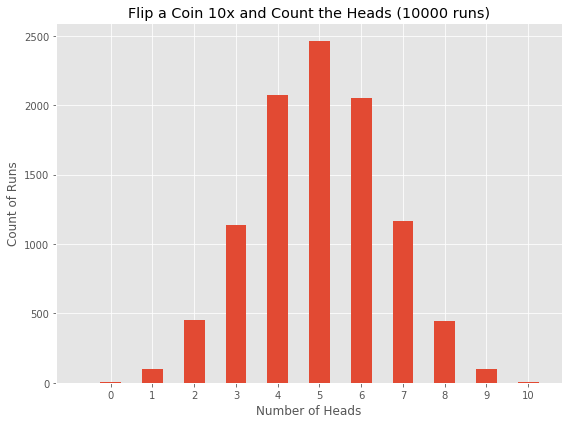

50% of the time, we will get between 4 and 6 Heads from 10 fair coin flips
50% of the time, we will get less than 4 Heads or more than 6 Heads from 10 fair coin flips
95% of the time, we will get between 2 and 8 Heads from 10 fair coin flips


In [3]:
# simulation parameters
runs = 10000
# count the number of Heads from 10 coin flips when simulated <runs> times
simulations = coin_flips(size=(runs, 10), return_arr=True).sum(axis=1)

# plotting distribution of number of Heads in 10 coin flips
fig, ax = plt.subplots(figsize=(6.4*5/4, 4.8*5/4), tight_layout=True)
ax.hist(simulations, bins=np.linspace(start=0-0.5, stop=10+0.5, num=23), align='left')
ax.set(title=f'Flip a Coin 10x and Count the Heads ({runs} runs)'
      ,xlabel='Number of Heads'
      ,ylabel='Count of Runs'
      ,xticks=range(10+1))
plt.show()

# print probability of obtaining various numbers of Heads from 10 coin flips
quantiles = sorted(simulations)
print(f'50% of the time, we will get between {quantiles[int(runs*0.25)]} and {quantiles[int(runs*0.75)]} Heads from 10 fair coin flips')
print(f'50% of the time, we will get less than {quantiles[int(runs*0.25)]} Heads or more than {quantiles[int(runs*0.75)]} Heads from 10 fair coin flips')
print(f'95% of the time, we will get between {quantiles[int(runs*0.025)]} and {quantiles[int(runs*0.975)]} Heads from 10 fair coin flips')

50% of the time, a fair coin will produce between 4 and 6 Heads in 10 flips. But that also means 50% of the time we will see less than 4 heads or more than 6 heads. So if we flip a coin 10 times and see 3 Heads, there is a good chance that the coin is fair!

What if a casino needs to determine if a coin is fair for a game? Exchanging coins at the bank is a laborious process, so if a coin flipped 10 times produces between 2 and 8 heads, we will not try to exchange the coins for new ones at the bank. We are keeping coins that produce 'fair coin' results 95% of the time, and that range of 2 to 8 heads can be considered our margin of error.

## NPS Margin of Error
So what is the margin of error for NPS scores? 

The width of the margin of error is affected by the size of our customer sample.

Let's pretend our team interacts with 22 customers and at the end we solicit an NPS score. The 22 customers, after their experience with our team, consists of 1 Detractor, 4 Neutrals, and 17 Promoters. The NPS score of this sample rounds to 72. That's a good score! Let's assume our team has the ability to produce an NPS of 72 for every group of consumers they interact with, so if they were able to interact with lots of customers (maybe 2000+ customers,) the NPS score from those 2000+ customers would be a 72.

But our team only has the capacity to interact with 22 customers at a time. So what is the margin of error on the NPS score from 22 customers?

Let's use simulation like before!

22 CUSTOMERS
On average, the team's NPS will be 72
50% of the time, NPS will be between 64 and 82
50% of the time, NPS will be below 64 and above 82
95% of the time, NPS will be between 50 and 91
2% of the time, NPS will be below 50


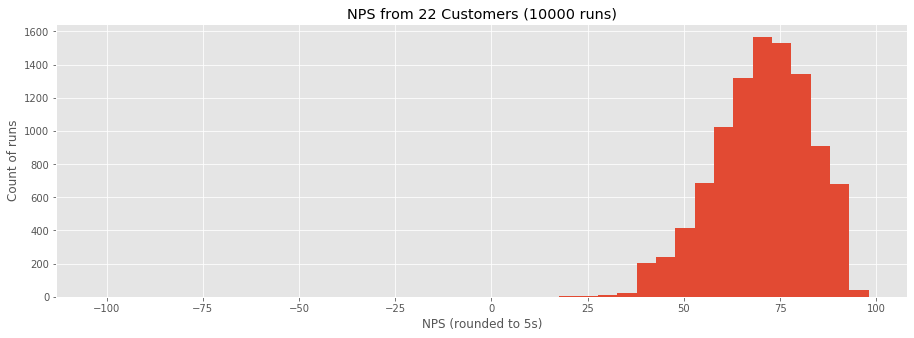

In [4]:
# 1 Detractor, 4 Neutrals, 17 Promoters for an NPS of 72
det_neu_pro = (1, 4, 17)

# plot the NPS variability for a 72 NPS Team when the sample size is 22 and print info
fig, ax = plt.subplots(figsize=(6.4*2, 4.8), tight_layout=True)
nps_sim(det_neu_pro, ax=ax, sample_size=22)
plt.show()

(written results are based on one simulation but margins will vary slightly every time the simulation is re-run)  
The margin of error on the team's NPS is 72 - 22 and 72 + 19, an asymmetric margin. 95% of the time, a team that can produce a 72 NPS experience for customers will achieve an NPS between 50 and 91 when 22 customers are surveyed. And 5% of the time, or 1 time in 20, the team will receive a poor NPS, below 50, even though it doesn't reflect their true ability.

### What happens when our sample size ranges from 1 to 22 customers?

1 CUSTOMERS
On average, the team's NPS will be 72
50% of the time, NPS will be between 100 and 100
50% of the time, NPS will be below 100 and above 100
95% of the time, NPS will be between -100 and 100
22% of the time, NPS will be below 50


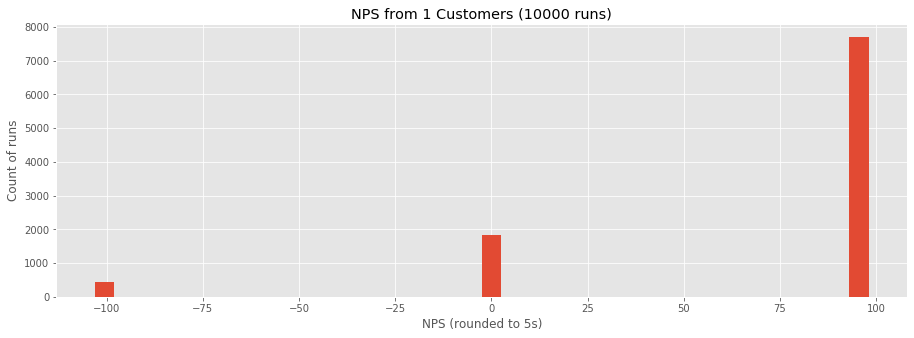

2 CUSTOMERS
On average, the team's NPS will be 72
50% of the time, NPS will be between 50 and 100
50% of the time, NPS will be below 50 and above 100
95% of the time, NPS will be between 0 and 100
12% of the time, NPS will be below 50


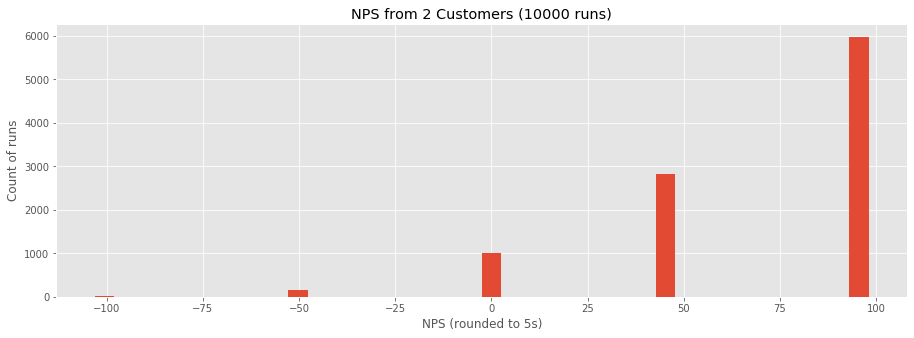

3 CUSTOMERS
On average, the team's NPS will be 73
50% of the time, NPS will be between 67 and 100
50% of the time, NPS will be below 67 and above 100
95% of the time, NPS will be between 0 and 100
20% of the time, NPS will be below 50


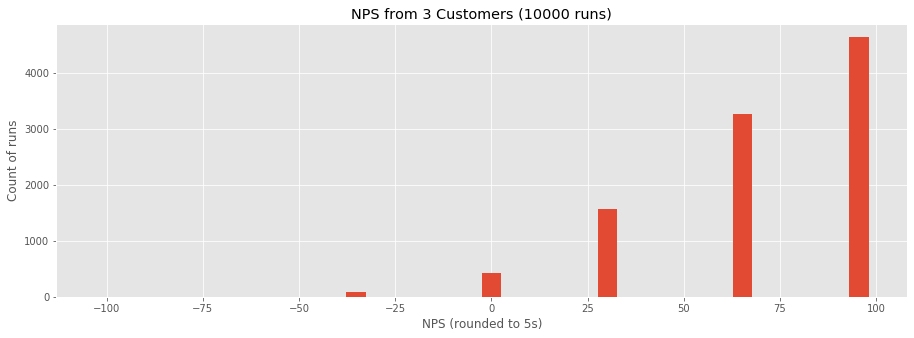

4 CUSTOMERS
On average, the team's NPS will be 72
50% of the time, NPS will be between 50 and 100
50% of the time, NPS will be below 50 and above 100
95% of the time, NPS will be between 0 and 100
10% of the time, NPS will be below 50


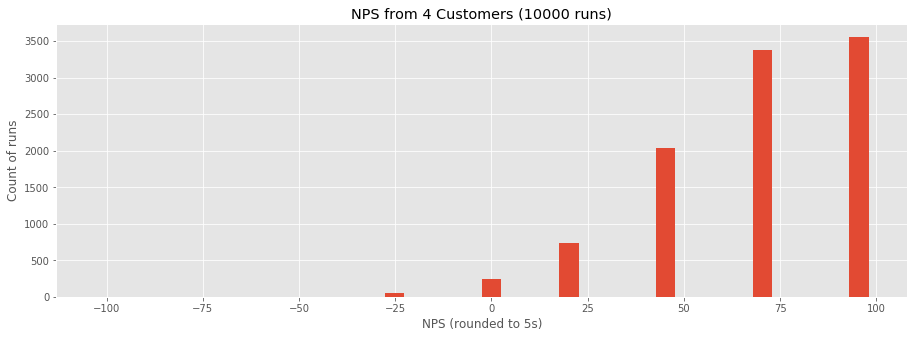

5 CUSTOMERS
On average, the team's NPS will be 72
50% of the time, NPS will be between 60 and 100
50% of the time, NPS will be below 60 and above 100
95% of the time, NPS will be between 20 and 100
16% of the time, NPS will be below 50


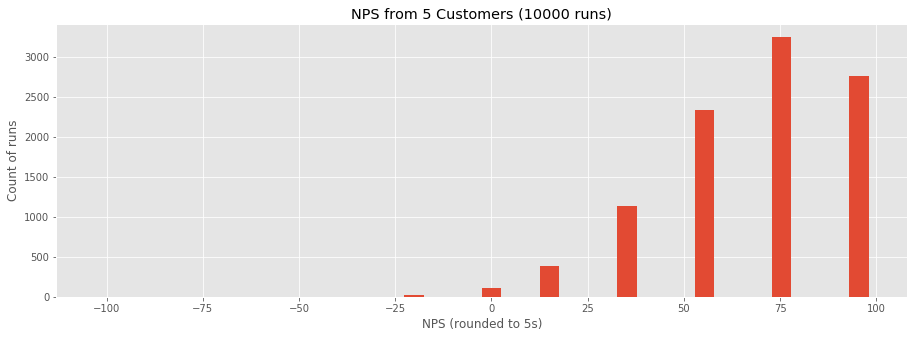

6 CUSTOMERS
On average, the team's NPS will be 72
50% of the time, NPS will be between 67 and 83
50% of the time, NPS will be below 67 and above 83
95% of the time, NPS will be between 17 and 100
9% of the time, NPS will be below 50


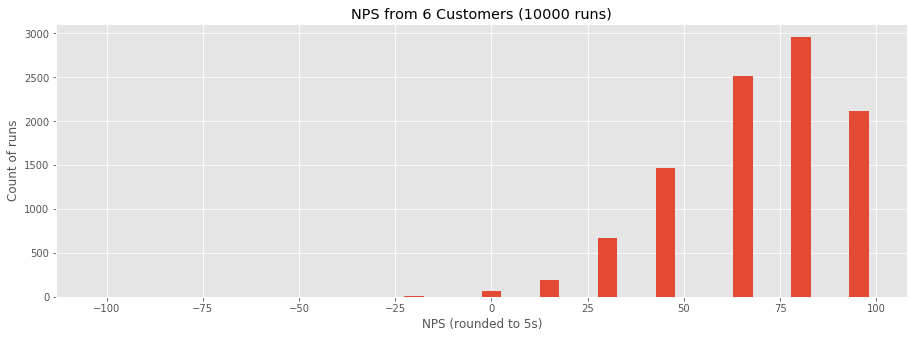

7 CUSTOMERS
On average, the team's NPS will be 72
50% of the time, NPS will be between 56 and 86
50% of the time, NPS will be below 56 and above 86
95% of the time, NPS will be between 28 and 100
13% of the time, NPS will be below 50


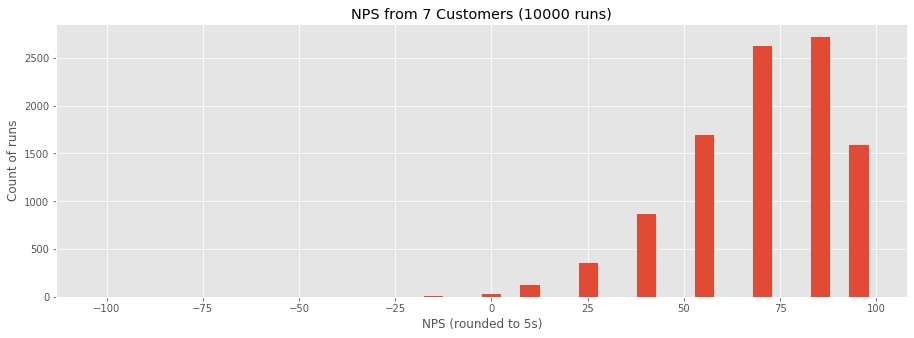

8 CUSTOMERS
On average, the team's NPS will be 72
50% of the time, NPS will be between 62 and 88
50% of the time, NPS will be below 62 and above 88
95% of the time, NPS will be between 25 and 100
7% of the time, NPS will be below 50


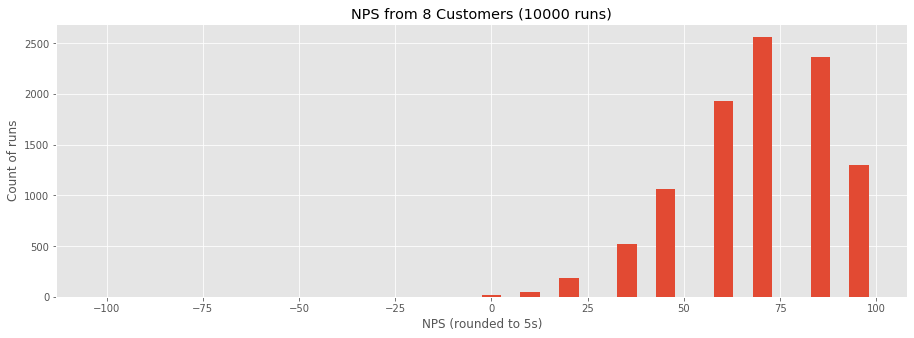

9 CUSTOMERS
On average, the team's NPS will be 72
50% of the time, NPS will be between 67 and 89
50% of the time, NPS will be below 67 and above 89
95% of the time, NPS will be between 33 and 100
10% of the time, NPS will be below 50


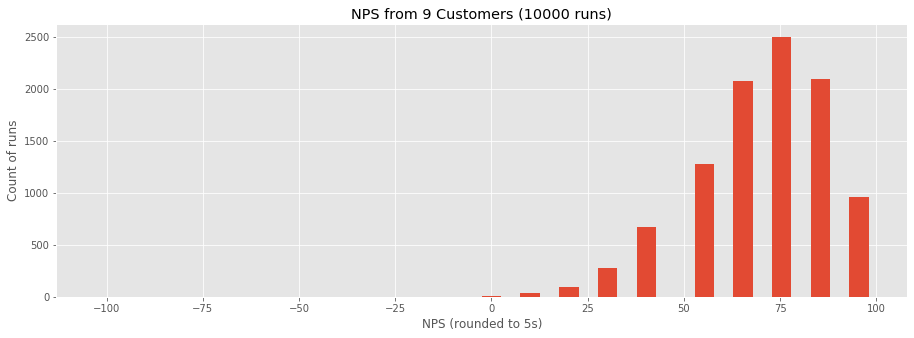

10 CUSTOMERS
On average, the team's NPS will be 73
50% of the time, NPS will be between 60 and 90
50% of the time, NPS will be below 60 and above 90
95% of the time, NPS will be between 40 and 100
6% of the time, NPS will be below 50


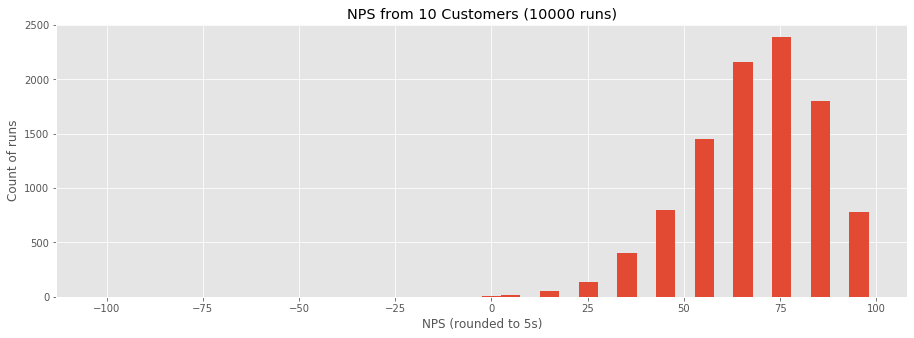

11 CUSTOMERS
On average, the team's NPS will be 72
50% of the time, NPS will be between 64 and 82
50% of the time, NPS will be below 64 and above 82
95% of the time, NPS will be between 36 and 100
9% of the time, NPS will be below 50


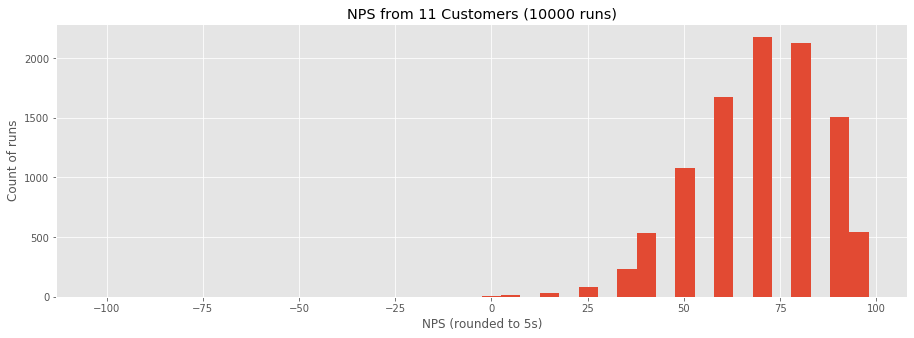

12 CUSTOMERS
On average, the team's NPS will be 72
50% of the time, NPS will be between 67 and 83
50% of the time, NPS will be below 67 and above 83
95% of the time, NPS will be between 42 and 100
5% of the time, NPS will be below 50


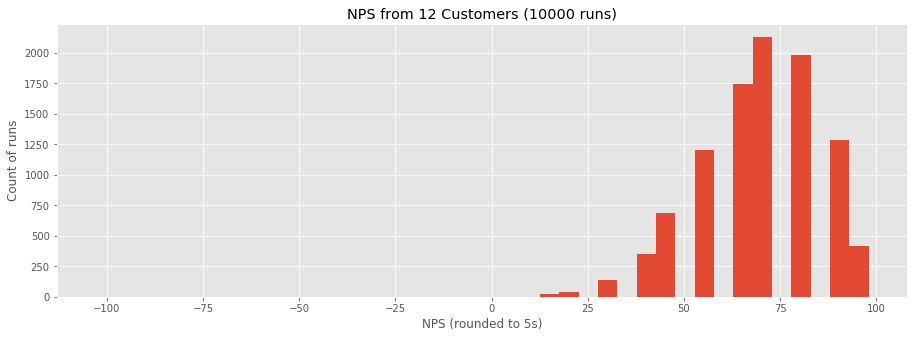

13 CUSTOMERS
On average, the team's NPS will be 72
50% of the time, NPS will be between 62 and 85
50% of the time, NPS will be below 62 and above 85
95% of the time, NPS will be between 38 and 100
7% of the time, NPS will be below 50


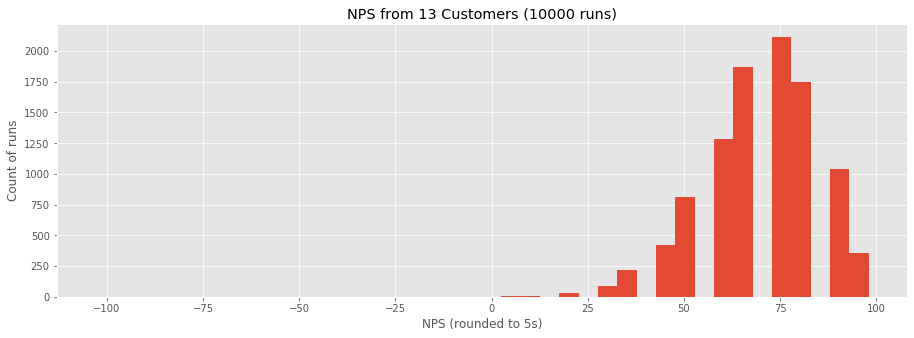

14 CUSTOMERS
On average, the team's NPS will be 72
50% of the time, NPS will be between 64 and 86
50% of the time, NPS will be below 64 and above 86
95% of the time, NPS will be between 43 and 100
4% of the time, NPS will be below 50


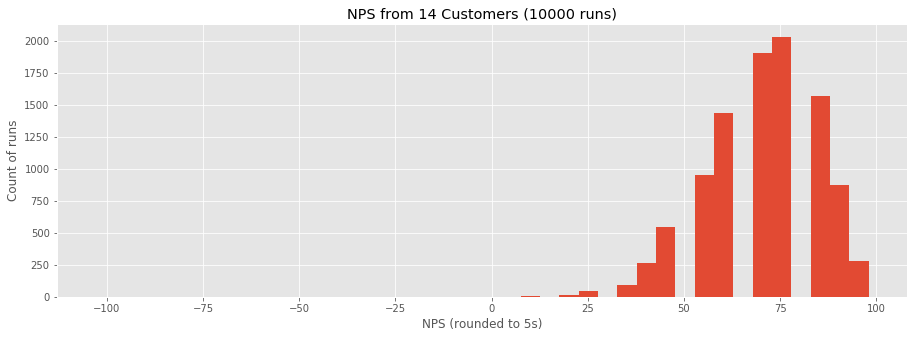

15 CUSTOMERS
On average, the team's NPS will be 72
50% of the time, NPS will be between 67 and 80
50% of the time, NPS will be below 67 and above 80
95% of the time, NPS will be between 40 and 93
6% of the time, NPS will be below 50


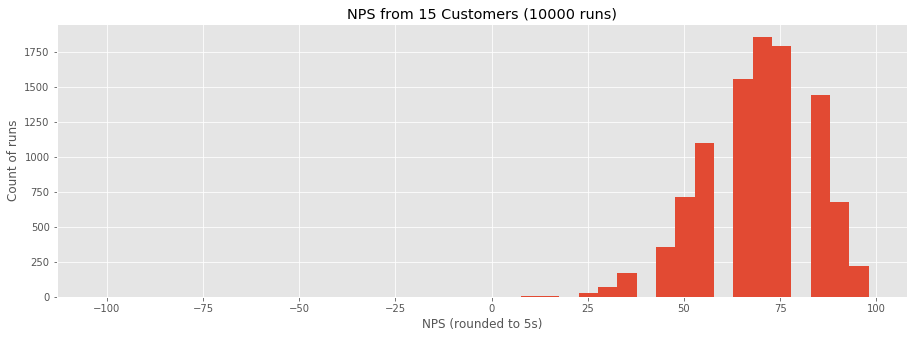

16 CUSTOMERS
On average, the team's NPS will be 72
50% of the time, NPS will be between 62 and 81
50% of the time, NPS will be below 62 and above 81
95% of the time, NPS will be between 44 and 94
3% of the time, NPS will be below 50


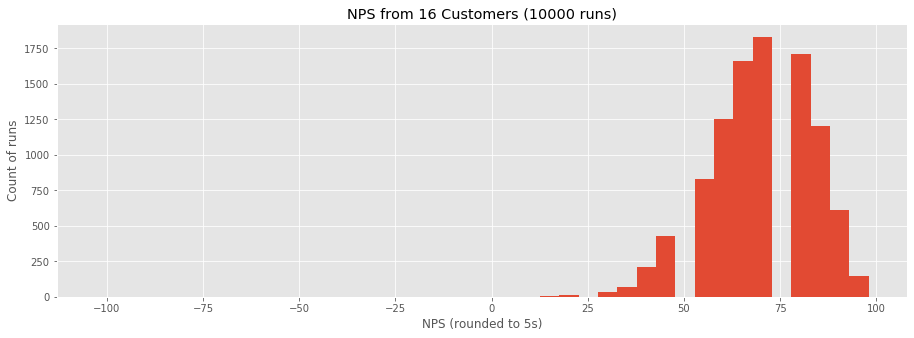

17 CUSTOMERS
On average, the team's NPS will be 72
50% of the time, NPS will be between 65 and 82
50% of the time, NPS will be below 65 and above 82
95% of the time, NPS will be between 47 and 94
5% of the time, NPS will be below 50


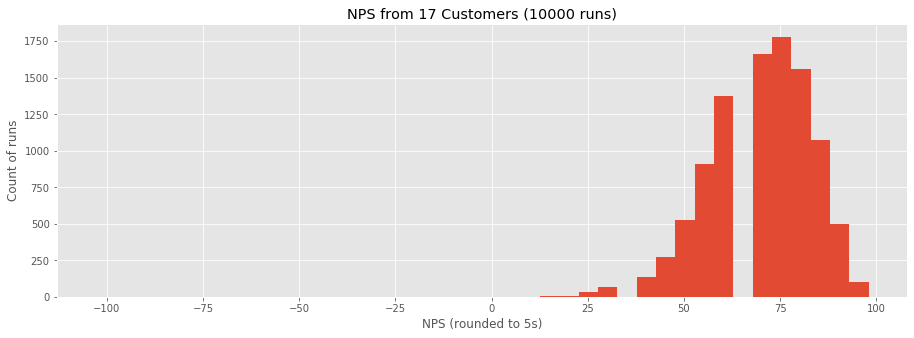

18 CUSTOMERS
On average, the team's NPS will be 72
50% of the time, NPS will be between 67 and 83
50% of the time, NPS will be below 67 and above 83
95% of the time, NPS will be between 44 and 94
3% of the time, NPS will be below 50


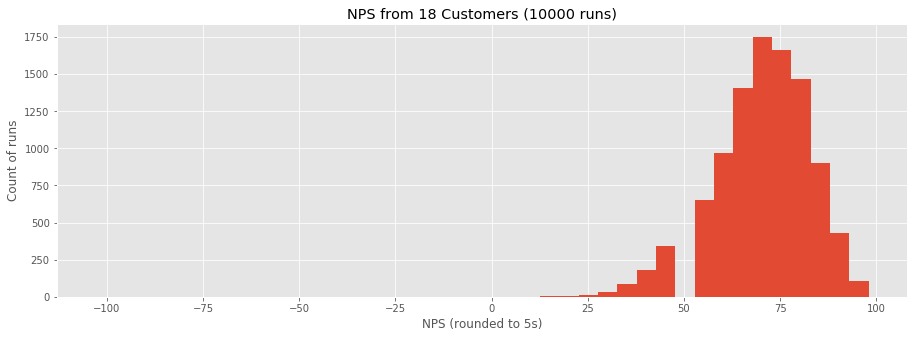

19 CUSTOMERS
On average, the team's NPS will be 72
50% of the time, NPS will be between 63 and 84
50% of the time, NPS will be below 63 and above 84
95% of the time, NPS will be between 47 and 95
4% of the time, NPS will be below 50


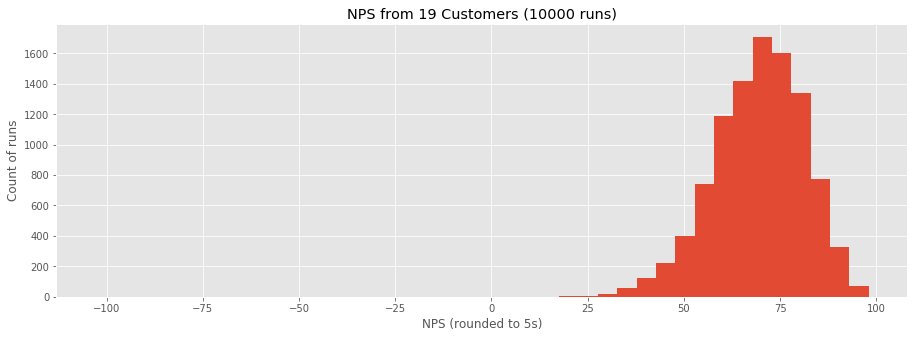

20 CUSTOMERS
On average, the team's NPS will be 72
50% of the time, NPS will be between 65 and 80
50% of the time, NPS will be below 65 and above 80
95% of the time, NPS will be between 50 and 95
2% of the time, NPS will be below 50


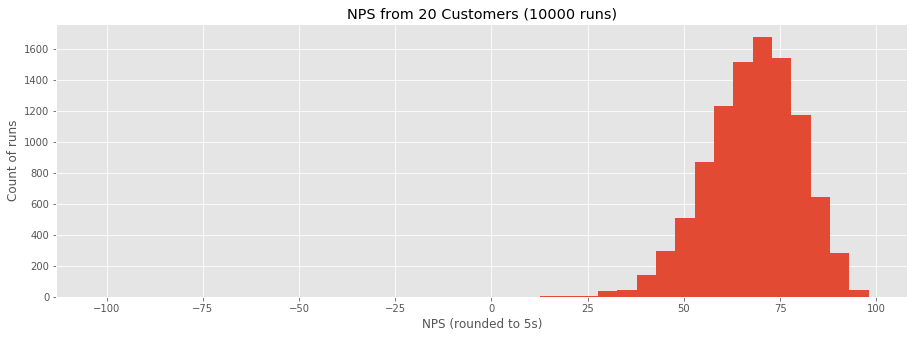

21 CUSTOMERS
On average, the team's NPS will be 72
50% of the time, NPS will be between 67 and 81
50% of the time, NPS will be below 67 and above 81
95% of the time, NPS will be between 48 and 95
3% of the time, NPS will be below 50


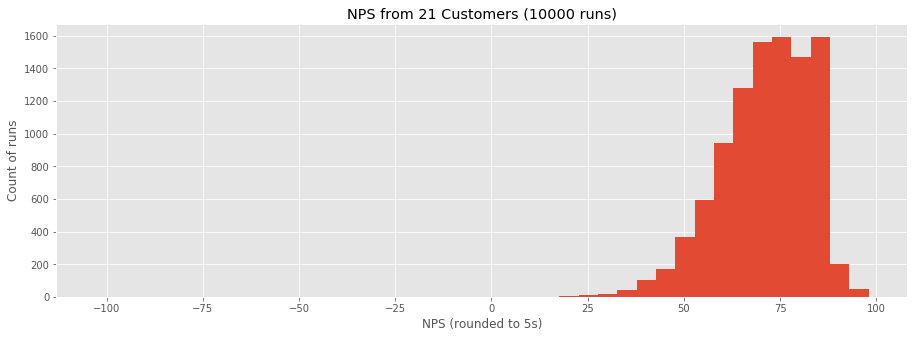

22 CUSTOMERS
On average, the team's NPS will be 72
50% of the time, NPS will be between 64 and 82
50% of the time, NPS will be below 64 and above 82
95% of the time, NPS will be between 50 and 91
2% of the time, NPS will be below 50


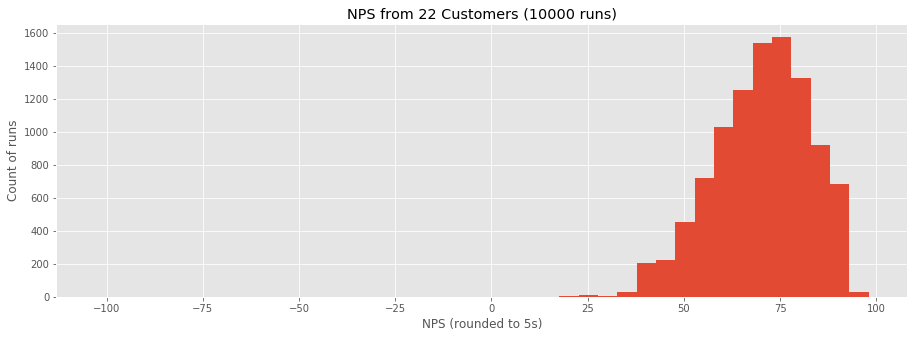

23 CUSTOMERS
On average, the team's NPS will be 72
50% of the time, NPS will be between 65 and 83
50% of the time, NPS will be below 65 and above 83
95% of the time, NPS will be between 48 and 91
3% of the time, NPS will be below 50


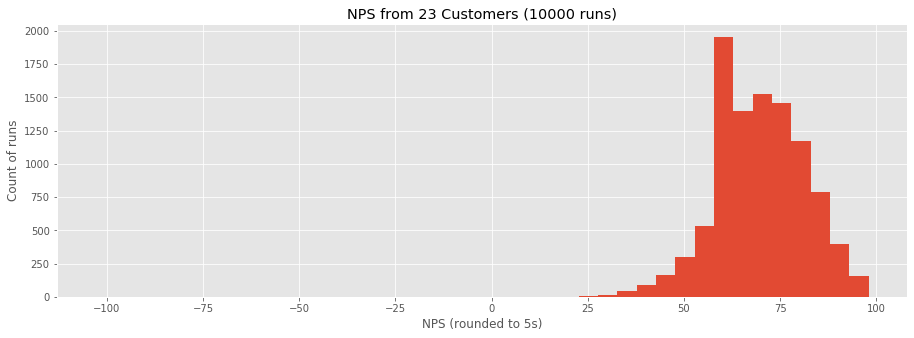

24 CUSTOMERS
On average, the team's NPS will be 72
50% of the time, NPS will be between 67 and 79
50% of the time, NPS will be below 67 and above 79
95% of the time, NPS will be between 50 and 92
2% of the time, NPS will be below 50


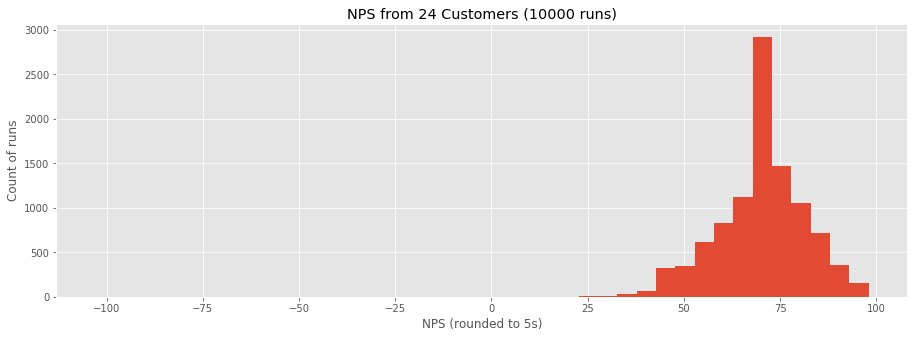

In [5]:
# 1 Detractor, 4 Neutrals, 17 Promoters for an NPS of 72
det_neu_pro = (1, 4, 17)
maximum_sample_size = 24

# store the simulated NPSs for every sample size
nps_sims_for_many_sizes = []

# plot the NPS variability for a 72 NPS Team when the sample size varies and print info
for n in range(1, maximum_sample_size+1):
    fig, ax = plt.subplots(figsize=(6.4*2, 4.8), tight_layout=True)
    nps_sims_for_many_sizes.append(nps_sim(det_neu_pro, ax=ax, sample_size=n))
    plt.show()

### How often will a 72 NPS team receive < 50 NPS when the size of the customer sample changes?

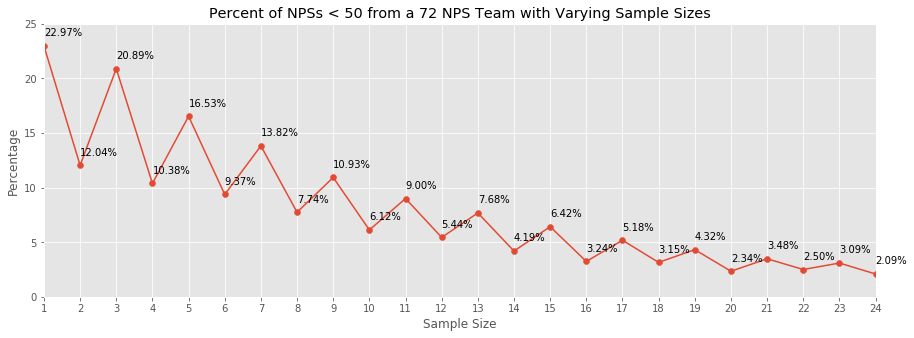

In [6]:
maximum_sample_size = 24

# plot the proportion of times a 72 NPS team will receive a < 50 NPS as sample size varies
fig, ax = plt.subplots(figsize=(6.4*2, 4.8), tight_layout=True)
# sample sizes
x = np.arange(1, maximum_sample_size+1)
# proprotion of times NPS < 50
y = (np.array(nps_sims_for_many_sizes) < 50).mean(axis=1) * 100
# line plot
ax.plot(x, y)
# scatter plot
ax.scatter(x, y)
# various plot options
ax.set(title='Percent of NPSs < 50 from a 72 NPS Team with Varying Sample Sizes'
      ,xlabel='Sample Size'
      ,ylabel='Percentage'
      ,xlim=(1, maximum_sample_size)
      ,xticks=x
      ,ylim=(0, 25))
# plot annotations
for x, y in zip(x, y):
    label = f'{y:.2f}%'
    ax.annotate(label
               ,(x, y)
               ,textcoords='offset points'
               ,xytext=(0, 10))
plt.show()

As can be seen from this simulation study, the NPS margin of error can be large when sample sizes are small. NPS surveys may not be able to accurately measure customer sentiment or accurately reflect team ability.

# Work in Progress - Margin of Error Plots

In [37]:
def nps_moe_plotter(npss, weeks, ax, title, confidence=0.95):
    '''Plots Margin of Errors for given arrays of Detractors, Neutrals, Promoters over weeks'''
    
    for week, nps in zip(weeks, npss):
        # nps is a count of Detractors, Neutrals, Promoters
        if len(nps) > 1:
            # (lower confidence bound, mean, upper confidence bound) of NPS
            cl, mean, cu = nps_margin_of_error(det_neu_pro=nps, sample_size=sum(nps), confidence=0.95)
            # scatter plot of mean NPS against week
            ax.scatter(week, mean)
            # plot confidence interval
            ax.vlines(week, cl, cu)
#         # nps is a single score
#         else:
#             ax.scatter(week, nps)

    # plot settings
    ax.set(title=f'{title} NPS'
          ,xlabel='Week'
          ,ylabel='NPS'
          ,xlim=(weeks[0]-0.05, weeks[-1]+0.05)
          ,xticks=weeks)

    # calculate the mean NPS across all weeks
    _, session_mean, _ = nps_margin_of_error(np.array(npss).sum(axis=0))
    # plot mean NPS across all weeks
    ax.hlines(session_mean, weeks[0]-0.5, weeks[-1]+0.5, linestyles='dashed')
    # annotate session mean NPS
    ax.annotate(f'{session_mean}'
               ,(weeks[0], session_mean)
               ,textcoords='offset points'
               ,xytext=(-25, 0)
               )

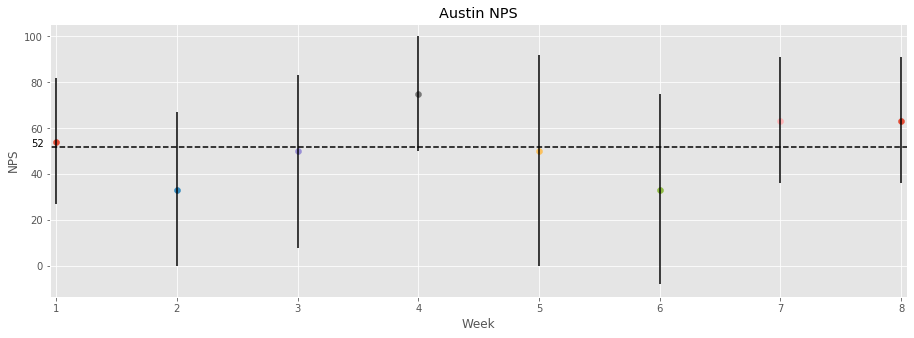

In [39]:
# npss = [[0, 5, 6], [1, 6, 5], [1, 4, 7], [0, 3, 9], [2, 2, 8], [2, 4, 6], [0, 4, 7], [0, 4, 7], [73], [64], [73], [82]]
# weeks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
npss = [[0, 5, 6], [1, 6, 5], [1, 4, 7], [0, 3, 9], [2, 2, 8], [2, 4, 6], [0, 4, 7], [0, 4, 7]]
weeks = [1, 2, 3, 4, 5, 6, 7, 8]

fig, ax = plt.subplots(figsize=(6.4*2, 4.8), tight_layout=True)
nps_moe_plotter(npss, weeks, ax, 'Austin')        
plt.show()

In [33]:
# npss = [[35], [44], [71]]
# weeks = [3, 6, 12]

# nps_moe_plotter(npss, weeks, 'DEN')

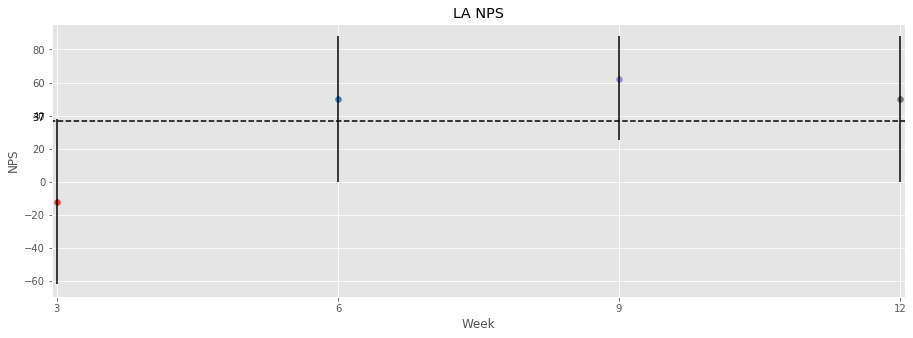

In [43]:
npss = [[3, 3, 2], [1, 2, 5], [0, 3, 5], [1, 2, 5]]
weeks = [3, 6, 9, 12]

fig, ax = plt.subplots(figsize=(6.4*2, 4.8), tight_layout=True)
nps_moe_plotter(npss, weeks, ax, 'LA')
plt.show()

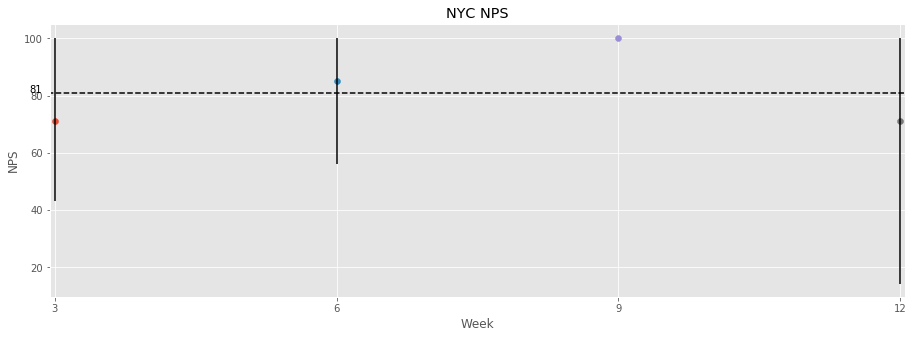

In [44]:
npss = [[0, 2, 5], [0, 1, 6], [0, 0, 6], [1, 0, 6]]
weeks = [3, 6, 9, 12]

fig, ax = plt.subplots(figsize=(6.4*2, 4.8), tight_layout=True)
nps_moe_plotter(npss, weeks, ax, 'NYC')
plt.show()

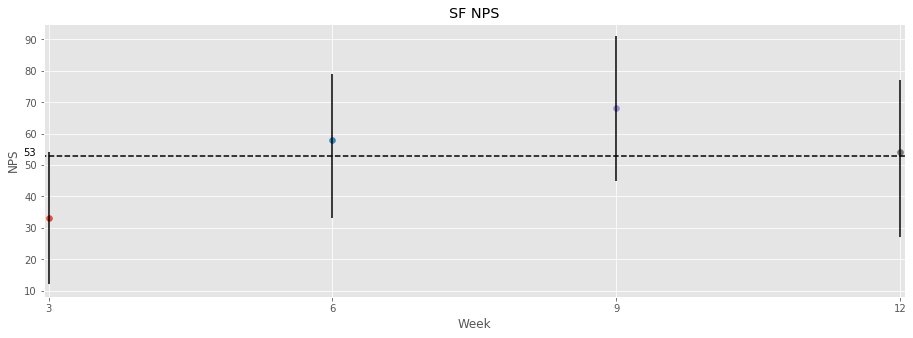

In [45]:
npss = [[1, 14, 9], [1, 8, 15], [1, 5, 16], [1, 8, 13]]
weeks = [3, 6, 9, 12]

fig, ax = plt.subplots(figsize=(6.4*2, 4.8), tight_layout=True)
nps_moe_plotter(npss, weeks, ax, 'SF')
plt.show()